In [18]:
from scripts import project_functions # This is called a relative import
df = project_functions.load_and_process("../../data/raw/BankCustomers.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Age,Gender,Dependent_count,Education,Marital_Status,Income,Card Type,Months_on_book,Relationship Count,Months Inactive,Contacts_Count_12_mon,Credit Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Utilization_Rate
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061,6.1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105,10.5
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000,0.0
3,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000,0.0
4,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1088,24,0.311,31.1


---
### RQ1: What percentage of customers have Utilization Rate less than 30%? 

Your credit Utilization Rate is very important as it tells us how much debt you currently have on your credit card. It is said that maintaining a Utilization Rate of 30% or below is a healthy credit score. Below is a visualization which shows the percentage of customers who have a Utilization Rate less than 30%. 

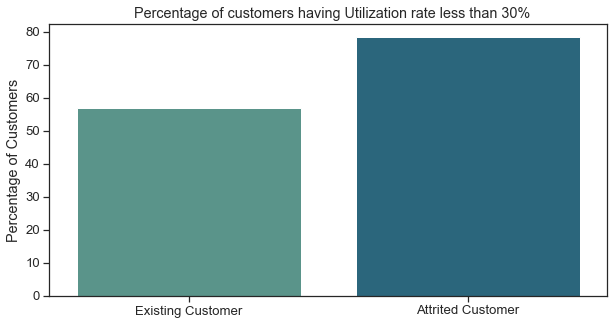

57% of the Existing Customers have a Utilization Rate less than 30%
78% of the Attrited Customers have a Utilization Rate less than 30%


In [31]:
project_functions.sns.set_theme(font_scale=1.2)
project_functions.sns.set_style("ticks")
lists=[]
df1 = df[df['Utilization_Rate']<=30]
a_flag = df1['Attrition_Flag'].unique()

for customers in a_flag:
    lists.append((len(df1[df1['Attrition_Flag']==customers])*100)/len(df[df['Attrition_Flag']==customers]))

project_functions.sns.barplot(x=a_flag, y=lists, data=df1, palette='crest').set_title('  Percentage of customers having Utilization rate less than 30%')
project_functions.plt.ylabel('Percentage of Customers')
project_functions.plt.show()
print('{}% of the Existing Customers have a Utilization Rate less than 30%'.format(round(lists[0])))
print('{}% of the Attrited Customers have a Utilization Rate less than 30%'.format(round(lists[1])))

- As we can see from the visualization above, a good amount of customers maintain a healthy credit score.
- More than half of Existing and Attrited customers have a Utilization rate less than 30%.
- But in comparison to the Existing Customer, more Attrited Customers have a good credit score.
---

### RQ2: How is the customers education level, card type and income related to the attrition?

The bank was worried about too many customers leaving the system, and it's important to see if we can find the correlation between some columns and the attrition of the customers. Education Level, card type and income were chosen, since we assume they might be the deciding factors in the customer leaving or staying in the bank.

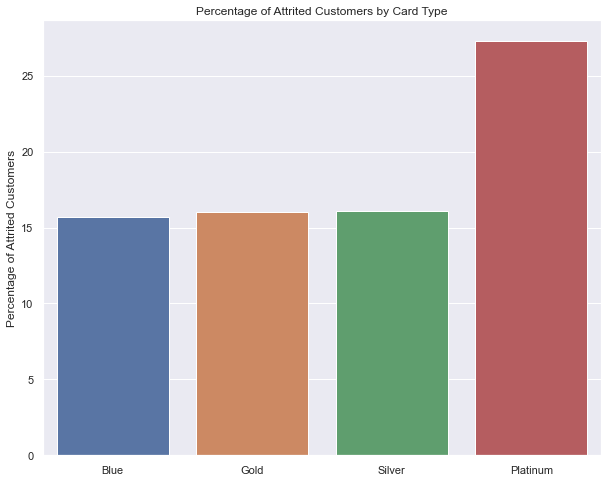

In [28]:
attrited_rows = df.loc[df['Attrition_Flag'] == "Attrited Customer"]
project_functions.sns.set(rc={'figure.figsize':(10,8)}) #increase the size of the graph
percentages = []
# get the percentage of attrited  from the total number
for cardType in df["Card Type"].unique():
    percentages.append((len(attrited_rows[attrited_rows["Card Type"]==cardType])*100)/len(df[df["Card Type"]==cardType]))
cards = df["Card Type"].unique()
catp = project_functions.sns.barplot(data=attrited_rows, y = percentages,
                   x=cards)
project_functions.plt.ylabel('Percentage of Attrited Customers')
project_functions.plt.title('Percentage of Attrited Customers by Card Type')
project_functions.plt.show()

The graph above, is probably one of the most important ones, it shows what percentage of the total are the attrited customers, based on the card type. It's hard to explain, but for example if 100 custoemrs have platinium card, and 26 of them attrited, then 26% attrited. If we simply drew the graph by the *number* of attritions, we wouldn't see that proportionally, platinium users attrite more. However, since it's only 26%, we can't yet be sure that the Platinium card leads to attrition. So let's continue exploring.

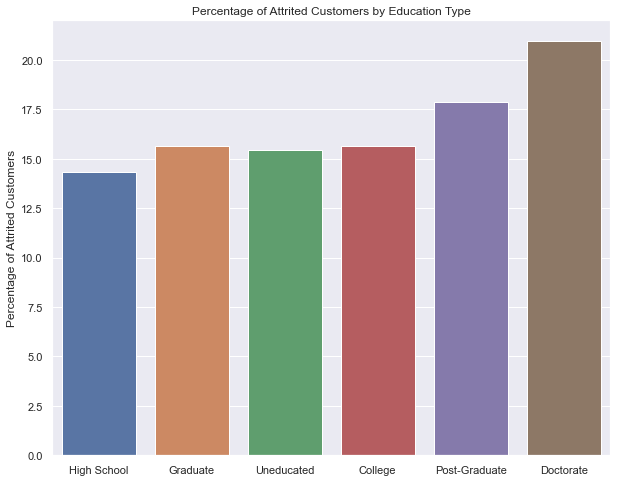

In [29]:
percentages = []
# get the percentage of attrited  from the total number
for education in df["Education"].unique():
    percentages.append((len(attrited_rows[attrited_rows["Education"]==education])*100)/len(df[df["Education"]==education]))
cards = df["Education"].unique()
catp = project_functions.sns.barplot(data=attrited_rows, y = percentages,
                   x=cards)
project_functions.plt.ylabel('Percentage of Attrited Customers')
project_functions.plt.title('Percentage of Attrited Customers by Education Type')
project_functions.plt.show()

With a similar code, we get our results for the education level. We see clearly that, customers with PhD have a noticably higher chance of leaving the bank. Since higher education level and platinium cards have a higher chance of attrition, we can already predict that people with higher income will leave the bank, but let's check.

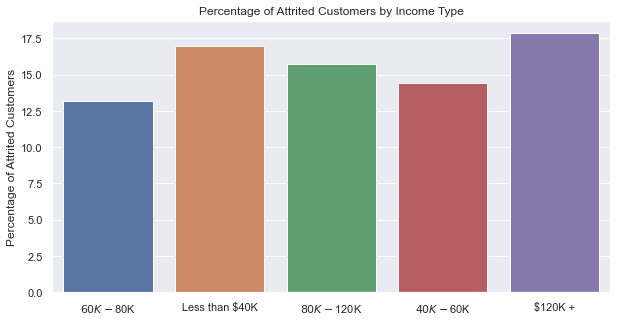

In [30]:
project_functions.sns.set(rc={'figure.figsize':(10,5)})
percentages = []
# get the percentage of attrited  from the total number
for income in df["Income"].unique():
    percentages.append((len(attrited_rows[attrited_rows["Income"]==income])*100)/len(df[df["Income"]==income]))
cards = df["Income"].unique()
catp = project_functions.sns.barplot(data=attrited_rows, y = percentages,
                   x=cards)
project_functions.plt.ylabel('Percentage of Attrited Customers')
project_functions.plt.title('Percentage of Attrited Customers by Income Type')
project_functions.plt.show()

From the graph above we see that, while our assumption is indeed right, the highest income have the highest chance of leaving the bank, it's not as straightforward as we expected it to be. The second highest attrition rate, around 16%, comes from the lowest income, less than $40k a year. 

In conclusion, while there is a noticably correlation between the card type, education level and income and the attrition. Nevertheless, the correlation is way too weak to make any definite predictions. Perhaps more columns need to be analyzed to reach a stronger conclusion.

---

### RQ.3 How many Credit Card customers are spending *over* the limit?

Spending over your credit limit most likely effects the credit score. The more a customer uses the credit card the utilization rates go up due to which not only an individual's *credit score* is affected negatively but also causes long term *financial issues*,*debt* etc.

>The graph below shows what type of card holders spend over the credit limit

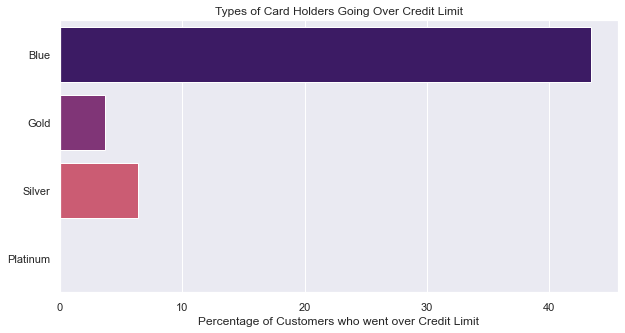

In [32]:
project_functions.sns.set(rc={'figure.figsize':(10,5)})
df2=df[df["Credit Limit"]<df["Total_Trans_Amt"]]
df2
per=[]
for card in df["Card Type"].unique():
    per.append((len(df2[df2["Card Type"] == card])*100)/len(df[df["Card Type"] == card]))
    
new_cardper = df["Card Type"].unique()
plot_data = project_functions.sns.barplot(data=df,y=new_cardper,x=per,palette='magma')
project_functions.plt.title('Types of Card Holders Going Over Credit Limit')
project_functions.plt.xlabel('Percentage of Customers who went over Credit Limit')
project_functions.plt.show()

Here we can see clearly that:
- The blue card holders are in highest number of people going over the credit limit.
- Silver and Gold follow respectively but less than 10 people are the ones who are spending over the limit.
- Surprisingly the Platinum category of credit cards see no customers spending over the limit which is quite good to see.

---

### RQ4: How is the customers Dependent Count related to the Transaction Amount?

We know that more the number of people in a family, the more we have to spend. Let's see a visualization which shows the relationship between Average Transaction Amount for the different numbers of Dependent Count.

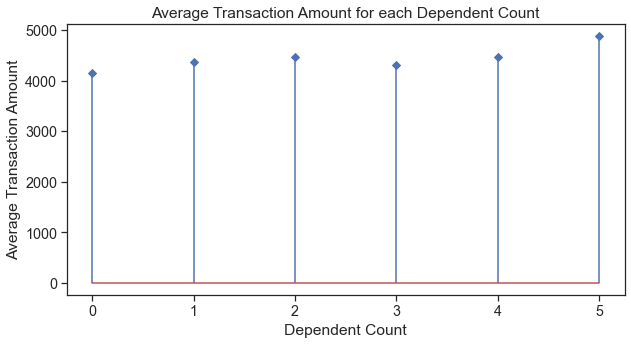

The average amount spent by customers having 0 Dependent Count: 4153
The average amount spent by customers having 1 Dependent Count: 4364
The average amount spent by customers having 2 Dependent Count: 4476
The average amount spent by customers having 3 Dependent Count: 4304
The average amount spent by customers having 4 Dependent Count: 4462
The average amount spent by customers having 5 Dependent Count: 4886


In [33]:
project_functions.sns.set_theme(font_scale=1.3)
project_functions.sns.set_style("ticks")
avg=[]
dc = sorted(df['Dependent_count'].unique())
for i in dc:
    df1 = df[df['Dependent_count']==i]
    avg.append(df1['Total_Trans_Amt'].mean())
    
project_functions.plt.stem(dc, avg, markerfmt ='D')
project_functions.plt.title('Average Transaction Amount for each Dependent Count') 
project_functions.plt.xlabel('Dependent Count')
project_functions.plt.ylabel('Average Transaction Amount')
project_functions.plt.show()

for num in dc:
    print('The average amount spent by customers having '+str(num)+' Dependent Count: {}'.format(round(avg[num])))


- This visualization clearly shows that customers with the highest Dependent Count has the highest Transaction Amount.
- It also shows that customers with the lowest Dependent Count has the lowest Transaction Amount.

---